In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

Image Label:  3


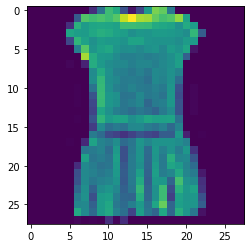

In [4]:
img_index = 3
img = train_images[img_index]
print("Image Label: ", train_labels[img_index])
plt.imshow(img)

In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [10]:
model.compile(
    optimizer= tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.1275 - accuracy: 0.6762
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6766 - accuracy: 0.7428
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5804 - accuracy: 0.7926
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5372 - accuracy: 0.8108
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5275 - accuracy: 0.8171


In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5873 - accuracy: 0.8042


[0.5873066782951355, 0.8041999936103821]

In [16]:
predictions = model.predict(test_images[0:5])
print(np.argmax(predictions, axis=1))
print(test_labels[0:5])

[9 2 1 1 6]
[9 2 1 1 6]


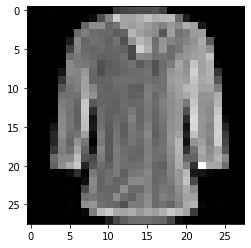

In [19]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(test_images[i], cmap='gray')
  plt.show